In [20]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import keras 
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [11]:
def vectorize_sequence(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for index, sequence in enumerate(sequences):
        result[index, sequence] = 1
    return result

In [12]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [18]:
y_train = train_labels.astype(np.float32)
y_test = test_labels.astype(np.float32)

In [24]:
x_val = x_train[:10000]
x_train_new = x_train[10000:]
y_val = y_train[:10000]
y_train_new = y_train[10000:]

In [65]:
def build_model(parameters):
    model = models.Sequential([
        layers.Dense(parameters, activation='relu', input_shape=(10000,)),
        layers.Dense(parameters, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [66]:
model = build_model(16)
history1 = model.fit(x_train_new, y_train_new, validation_data=(x_val, y_val),
                     epochs=20, batch_size=512, verbose=0)

In [67]:
model2 = build_model(4)
history2 = model2.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), 
                     epochs=20, batch_size=512)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.6120 - accuracy: 0.6453 - val_loss: 0.5687 - val_accuracy: 0.7729
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.5274 - accuracy: 0.7890 - val_loss: 0.5258 - val_accuracy: 0.7926
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.4823 - accuracy: 0.8471 - val_loss: 0.5033 - val_accuracy: 0.8003
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.4496 - accuracy: 0.8802 - val_loss: 0.4797 - val_accuracy: 0.8554
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.4243 - accuracy: 0.9035 - val_loss: 0.4661 - val_accuracy: 0.8737
Epoch 6/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.4017 - accuracy: 0.9215 - val_loss: 0.4572 - val_accuracy: 0.8698
Epoch 7/20
15000/15000 [==============================] - 1s 94us/s

In [71]:
model3 = build_model(32)
history3 = model3.fit(x_train_new, y_train_new, validation_data=(x_val, y_val), 
                     epochs=20, batch_size=512)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.4823 - accuracy: 0.7880 - val_loss: 0.3369 - val_accuracy: 0.8780
Epoch 2/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.2635 - accuracy: 0.9060 - val_loss: 0.4192 - val_accuracy: 0.8193
Epoch 3/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.1989 - accuracy: 0.9290 - val_loss: 0.2763 - val_accuracy: 0.8871
Epoch 4/20
15000/15000 [==============================] - 1s 41us/step - loss: 0.1538 - accuracy: 0.9481 - val_loss: 0.3647 - val_accuracy: 0.8604
Epoch 5/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.1218 - accuracy: 0.9571 - val_loss: 0.3051 - val_accuracy: 0.8831
Epoch 6/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.0993 - accuracy: 0.9666 - val_loss: 0.3322 - val_accuracy: 0.8819
Epoch 7/20
15000/15000 [==============================] - 1s 39us/s

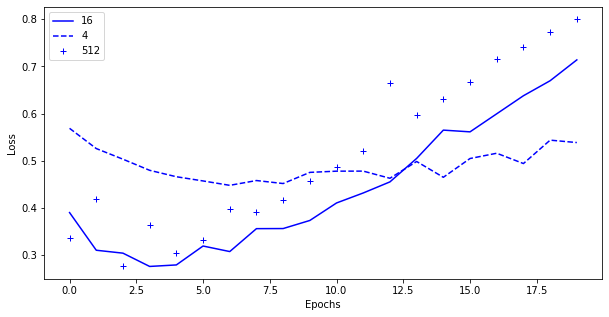

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(history1.epoch, history1.history['val_loss'], 'b-', label='16')
ax.plot(history2.epoch, history2.history['val_loss'], 'b--', label='4')
ax.plot(history3.epoch, history3.history['val_loss'], 'b+', label='512')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend()
plt.show()